# Data Analysis Framework for Photographic Collection Data from the KHI

# Table of contents

<ol start="1">
    <p><a href='#start'>Getting started: How to use this notebook</a></p>
    <p style="margin-top:0"><a href='#jnglossary'>Notebook Glossary</a></p>
    <p style="margin-top:0"><a href='#preparation'>Preparation</a></p>
    <li><a href='#upload'>Upload your KHI dataset</a></li>
    <li><a href='#refining'>Refining your photograph dataset: applying filters</a></li>
    <li><a href='#sort'>Sort your data</a></li>
    <li><a href='#visualization'>Data visualization</a></li>
    <li><a href='#download'>Download results</a></li>
    <p style="margin-top:0"><a href='#useful'>Useful links</a></p>
    <p style="margin-top:0"><a href='#contact'>Contact information</a></p>
</ol>

# Getting Started: How to Use This Notebook<a id='howto'></a>

Welcome to this interactive data analysis experience!</br>
This Jupyter Notebook is designed to help you analyze archival data efficiently, even if you're new to programming. Follow the instructions carefully to execute your analysis. If you want more information on <a href="https://docs.jupyter.org/en/latest/#" target="_blank">what a Jupyter Notebook is</a>, you can visit this link. Here's how to get started:

<h3 style="display:inline-block "><img style="display:inline-block; height:24px" src= 'magn.png' alt='Download icon'> <b>Understanding Jupyter Notebooks:</b></h3></br>

- Each section in this notebook is contained within a "cell." Cells can contain explanatory text (like this), Python code, or both.
- To execute a cell and see its output, select the cell and press `Shift + Enter` or click on the `Run` button in the menu above.
- The notebook operates using a computational engine known as a "kernel," responsible for executing code and maintaining variable states.
- Sometimes it may be necessary to restart the kernel, especially if you encounter unexpected behavior or want to clear all previous variable assignments. You can restart the kernel by clicking on the "Kernel" menu above and selecting "Restart Kernel" or "Restart & Clear Output".

<h3 style="display:inline-block "><img style="display:inline-block; height:28px" src= 'interact.png' alt='Download icon'> <b> Interacting with the Notebook:</b></h3></br>

- Use the provided cells to upload your archival data files (in XML format) using the upload button.
- Execute the cells sequentially to execute the pre-written code and perform data analysis tasks.

<h3 style="display:inline-block "><img style="display:inline-block; height:28px" src= 'download2.png' alt='Download icon'> <b> Download results:</b></h3></br>

- This notebook allows you to download the results of your analysis to your device. The data will be saved in CSV format (see the Notebook Glossary for more details).

<h3 style="display:inline-block "><img style="display:inline-block; height:32px" src= 'help.png' alt='help icon'> <b> Getting help</b></h3></br>

- If you encounter any issues or have questions, refer to the explanatory texts, comments, glossary, and links section for clarification.
- Feel free to modify and experiment with the code to suit your specific research needs.
- For additional assistance or inquiries, please see the <a href="#contact">Contact information</a> section.

<div class="alert alert-block alert-info">
<b>Note:</b> Don't worry about the technical details - simply execute the cells and observe the outputs that are generated. The notebook is designed to handle the computational tasks behind the scenes, allowing you to focus on exploring and interpreting the results.
</div>

# Notebook Glossary<a id='jnglossary'></a>

<b>Cell: </b>
>A cell is a container within a Jupyter Notebook where you can write and execute code, display text or include other content like images and multimedia. Each cell can be individually executed to see its output.

<b>Execute/Run:</b>
>In the context of programming and Jupyter Notebooks, "execute" or "run" refers to the process of running a cell containing code to perform the actions specified within that code. Pressing Shift+Enter in a Jupyter Notebook or using the "Run" button in the notebook interface cell executes the code and displays the output.

<b><a id='dataset'></a>Dataset:</b>
>A dataset is a collection of organized data used for analysis or research. It consists of structured or semi-structured information presented in a specific format, such as rows and columns. Datasets are important for tasks like analyzing trends, drawing conclusions, and conducting research in various fields.

<b>Python:</b>
>Python is a popular programming language known for its simplicity and readability. It is widely used for various purposes, including web development, data analysis, and automation. Python's clear and straightforward syntax makes it beginner-friendly and accessible for people learning to code.

<b><a id='string'></a>String:</b>
>A string is a sequence of characters enclosed in quotes (e.g., 'hello', "world"). Strings are used to represent textual data in programming and can be manipulated using various string operations.

<b>List:</b>
>A list is a data structure that represents an ordered collection of items, where each item can be of any data type (e.g., numbers, strings, other lists). Lists are versatile and widely used for storing and manipulating data.

<b>DataFrame:</b>
>A DataFrame is a two-dimensional tabular data structure in pandas (a Python library for data manipulation and analysis). It consists of rows and columns, where each column can have a different <a href="https://docs.python.org/3/library/datatypes.html" target="_blank">data type</a> (e.g., integer, string, float). DataFrames are widely used for data analysis and manipulation tasks.

<b>CSV:</b>
>CSV (Comma-Separated Values) is a simple file format used to store tabular data, where each line in the file corresponds to a row of data, and fields are separated by commas. CSV files are commonly used for data exchange between different software applications.

<b>Library:</b>
>In programming, a library refers to a collection of reusable code and functions that can be imported and used in your own programs. Libraries like pandas, matplotlib, and numpy are commonly used in data analysis with Python.

<b>Function:</b>
>A function is a block of reusable code that performs a specific task. Functions are designed to take inputs (arguments) and produce outputs, allowing you to modularize code and make it more organized and reusable.

<b>Argument:</b> 
>An argument (or parameter) is a value passed to a function or method when it is called. Arguments provide input data that the function can operate on, allowing for customization and flexibility in function behavior

<b>Error/Exception:</b>
>An error or exception is a problem that occurs during the execution of a program, causing it to behave unexpectedly or fail. Errors can arise due to syntax mistakes, logical errors, or issues with input data. Common examples are syntax errors (e.g., typos in code), runtime errors (e.g., division by zero), or name errors (e.g., referencing undefined variables).

<b>Widget:</b>
>A widget in Jupyter Notebook is a graphical tool that allows users to interact with and control elements in the notebook environment. Widgets can be used to input data, make selections, or trigger actions.

<b>XML:</b>
>XML is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. XML uses tags to define the structure and meaning of data elements, making it suitable for representing structured data with nested hierarchies.

# KHI Dataset Glossary

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

**Art Object ID `(object_id)`:** Unique ID identifying artworks within the dataset.

**Iconography `(iconography)`:** IconClass

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

**Photo ID `(photo_id)`:** Unique ID identifying photographs within the dataset.

# Environment Setup<a id='preparation'></a>

The cells below are responsible for downloading necessary libraries (dependencies) and importing them into our notebook environment. Dependencies are additional pieces of code that provide specific functionality, such as data manipulation, visualization, or analysis tools.

When you run these cells by pressing `Shift + Enter`, the notebook will automatically download the required dependencies if they are not already installed on your system. This process may take a moment, but it ensures that all the tools we need to analyze and work with data are readily available.

Once the dependencies are downloaded and imported, you can proceed with the rest of the notebook.

In [1]:
!pip install pathlib
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
import pathlib
import xml.etree.ElementTree as ET
import re
from pprint import pprint
import codecs
from resources.PhotoAttributes import PhotoAttributes
from resources.dictionaries_file import *
from resources.Classes_file import *
from Thesis_project_main import *
from module import *
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import ipywidgets as widgets
from ipywidgets import HTML
from IPython.display import display
import base64
from ipywidgets import interact, interactive, fixed, interact_manual
%run ./resources/dataclasses_creation.py

# 1. Upload Your KHI Data<a id='upload'></a>

This section allows you to **upload your XML file** containing data about the collections of the KHI.

Follow these steps to upload your file:

1. Run the following cell.
2. Click on the "Upload" button that will appear below.
3. Choose the XML file from your device.
4. **Important:** Executing the cell by pressing Shift+Enter will reset your file upload.

In [3]:
display(upload)

FileUpload(value=(), accept='.xml', description='Upload')

If you prefer, you can explore a test file with data about <b>Candido Verri's photographic collection</b> and other  photographs depicting the same artworks within the Photothek's archive without the need to upload any additional file. Just run the cell below, and the test data will load automatically. This way, you can start exploring and analyzing the dataset right away following the notebook's instructions.

**Execute the following cell** by pressing `Shift + Enter` to decode your data and save the content in a text file. This file will be used for the next steps of the analysis.

In [4]:
try:
    if upload.value and len(upload.value) > 0 and upload.value[0] is not None:
        uploaded_file = upload.value[0]
        codecs.decode(uploaded_file.content, encoding="windows-1252")
        with open("./saved-output.txt", "wb") as fp:
            fp.write(uploaded_file.content)
        print('Your file has been uploaded successfully!')
    else:
        with open("metadata/Verri_1908_test_data.xml", "rb") as testfile:
            uploaded_file = testfile.read()
            codecs.decode(uploaded_file, encoding="windows-1252")
            with open("./saved-output.txt", "wb") as fp:
                fp.write(uploaded_file)
        print('You can start exploring the test file!')
except IndexError:
    print("Error: Please upload an XML file in the 'Upload' cell above and try again.")



You can start exploring the test file!


### Overview of your <a href="#dataset">dataset</a>

Execute the following cell to get an overview of your dataset. The data will be presented within a **DataFrame**, which is a structured way to organize and manipulate tabular data in computer programming and data analysis, particularly with large datasets. In this DataFrame:

- Each **row** represents an individual entry or record in your dataset.
- Each **column** represents a specific type of information, specified in the column name.

DataFrames let you organize, explore, and manipulate data easily, allowing tasks such as **filtering**, **sorting**, and **summarizing data**. You can also perform statistical analysis, create visualizations, and prepare data for machine learning models using DataFrames in Python and other programming languages. 



In [5]:
# Convert the text file into a dataframe.
photos_collection = functions_for_KHI_data_extraction.get_dataframe("./saved-output.txt")

# The dataframe "photos_dataframe" also includes entries of the photographs' digital version. 
photos_dataframe = photos_collection.dataframe

# The dataframe "photos_dataframe_no_digital" excludes entries of digital photos.
# If you prefer not to include data about digital versions of photographs in your results,
# this dataframe will provide more accurate outcomes for your analysis
photos_dataframe_no_digital = photos_collection.dataframe_no_scan
photos_dataframe_no_digital = photos_dataframe_no_digital.set_index('photo_id')

# Display the first 100 rows of the dataset
display(photos_dataframe_no_digital.head(100).style.set_sticky(axis="index"))

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,type_category,type_shape,material,technique,dimension_heightwidth,dimension_type,iconography,object_administrator,hosting_building,ref_relationship,literature_short_title,record_creator_institution,stylistic_geographical_origin,literature_citation,architecture_name,architecture_carrier,location_obj_architecture,text_in_artwork,photo,photo_entry_archival_date,photo_archival_section,photo_administrator,photo_negative_number,photo_old_negative_number,photo_material,photo_notes,photo_type,photo_color,photographer,photo_date,photo_acquisition,photo_provenance,photo_storage_date,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
photo_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6713,07580354,None,"[Piccolpasso, Cipriano]",None,None,Plan der Fortezza Paolina in Perugia,None,None,Zeichenkunst,None,Zeichnung,None,None,None,None,None,"[61E(Perugia), 45K13]","[Verwalter: Biblioteca Nazionale Centrale, Rom]",None,None,None,Kunsthistorisches Institut in Florenz – Max-Planck-Institut,None,None,None,None,None,None,Foto,1906-01-01,Stadtbau,None,None,None,Albuminpapier,Cimelia Photographica (Standardformat),None,monochrom,"['Verri, Candido']",nan,None,None,None,None,None,"['24 x 15,9 cm (Foto)']",Gesamtansicht,Signatur zuvor: Arch. Festg. & Signatur zuvor: Z. XVI,jouve_KHI-Test3354,gesperrt,None,None,None
6713,07580354,None,"[Piccolpasso, Cipriano]",None,None,Plan der Fortezza Paolina in Perugia,None,None,Zeichenkunst,None,Zeichnung,None,None,None,None,None,"[61E(Perugia), 45K13]","[Verwalter: Biblioteca Nazionale Centrale, Rom]",None,None,None,Kunsthistorisches Institut in Florenz – Max-Planck-Institut,None,None,None,None,None,None,Foto,1908-04-15,Stadtbau,"['Verri, Candido']",None,None,Albuminpapier,Cimelia Photographica (Standardformat),None,monochrom,"['Verri, Candido']",1908,Kauf,None,None,None,None,"['23,9 x 16,1 cm (Foto)']",Gesamtansicht,None,None,None,None,None,None
618672,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,Truhe,None,['Holz'],None,None,None,"[46A122(Della Rovere), 73D722, 41A734, 48A98 :, 48A9875]","[Verwalter: Museo Civico Palazzo dei Consoli, Gubbio]",None,None,"[TCI Umbria, 1999]",Kunsthistorisches Institut in Florenz – Max-Planck-Institut,umbrisch,None,None,None,None,None,Foto,2017-08-28,Kunstg. Holz,['KHI'],1244.62 Sigismondi,None,None,None,None,color,"['Sigismondi, Roberto']",2016,Kauf,None,2016.09,tif,Digitalkamera,None,Gesamtansicht,P001924_RS1244_co_GUBBIO_Pinakoteca,fle0011762x_p,None,Kunsthistorisches Institut in Florenz – Max-Planck-Institut,None,None
6481,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,Truhe,None,['Holz'],None,None,None,"[46A122(Della Rovere), 73D722, 41A734, 48A98 :, 48A9875]","[Verwalter: Museo Civico Palazzo dei Consoli, Gubbio]",None,None,"[TCI Umbria, 1999]",Kunsthistorisches Institut in Florenz – Max-Planck-Institut,umbrisch,None,None,None,None,None,Foto,1908-04-15,Mal. Ren.,"['Verri, Candido']",None,None,Albuminpapier,Cimelia Photographica (Standardformat),None,monochrom,"['Verri, Candido']",1908,Kauf,None,None,None,None,"['11,8 x 16,9 cm (Foto)']",Gesamtansicht der Decke,None,None,None,None,None,None
612812,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinus und Stephanus",None,None,Tafelmalerei,None,Retabel,Triptychon,"['Tempera', 'Holz', 'Gold']",None,"117,5 x 137 cm",None,"[11H(Augustine), 11H(Nicholas of Tolentino), 11H(Stephen)]","[Verwalter: Pinacoteca Civica Bruno Molajoli, Fabriano]","[Herkunftsort: Sant'Agostino, Fabriano]",None,"[Da Giotto a Gentile, 2014, Marcelli, Pinacoteca, 1997]",Kunsthistorisches Institut in Florenz – Max-Pl

<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Notice that only the first 100 rows of the DataFrame are shown above. If you want to see the whole DataFrame or work with it outside of this notebook, you can <b>download your table as CSV file</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [6]:
res = photos_dataframe_no_digital.to_csv()

#File
filename = 'photos_data_table.csv'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#Display download button
html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

<div class="alert alert-block alert-info">
<b>Note:</b> You can change the file name by replacing the <a href='#string'>string</a> "photos_data_table.csv" within brackets.</br>You can explore the documentation on the pandas.DataFrame.to_csv() download method here: <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html" target="_blank">pandas.Dataframe.to_csv()</a> (official documentation).</div>

### Dataset Information

Execute the cell below to view a brief <b>description of the dataset</b> you're analysing.

In [7]:
print(photos_collection.get_dataset_description())

About this dataset:
Number of photos: 187
Number of objects: 44


# 2. Refining your photograph dataset: applying  filters <a id='refining'></a>

DataFrames are a powerful data structure that allow easy manipulation and filtering of data. In this section, you can filter the dataset by specifying a search text and the column in which you want to perform the search.

<div class="alert alert-block alert-info">
<b>Note:</b> The KHI dataset is typically in German, as German is the default language used for photo cataloguing within the KHI.
</div>

### Filter by any column

Execute the following cell to <b>display your filter tools</b>.</br>
Choose the column you want to filter from the dropdown menu and write your search text in the dedicated field:

In [8]:
filter_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns if column != 'date']
filter_column_widget.value=photos_collection.dataframe_no_scan.columns[2]
display(filter_column_widget)
display(text_to_filter)

Dropdown(description='Column:', index=2, options=('obj_id', 'obj_id_level2', 'artist', 'other_artist_attributi…

Text(value='', description='Search text:', placeholder='Type your text here')

Execute the following cell to **see the results**.</br>
Notice that, **if you leave the search text box blank**, no filter will be applied and you will see an overview of the whole DataFrame.

<div class="alert alert-block alert-info">
    <b>Note:</b> When you filter data in a DataFrame, the numbers that label each row (indices) might not stay in order. This happens if some rows are left out when you filter the data. But don't worry! Even if the numbers aren't in order, you can still look at and work with the filtered data just fine. Each row still has all the same information it had before, so you can use it for whatever you need, like analyzing or comparing different pieces of data.</div>

In [9]:
filter_by_column = photos_collection.filter_by(filter_column_widget.value, text_to_filter.value)
filter_by_column

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
11,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,tif,Scanner Imacon Flextight 848,[9x12],Gesamtansicht,None,fln0410802x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
12,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,tif,Scanner Imacon Flextight 848,[9x12],Detail,None,fln0410803x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
13,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,None,None,"[18,2 x 23,8 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
21,70014331,None,[Giannicola di Paolo],None,None,Beweinigung Christi,None,None,Malerei,None,...,None,None,"[20,8 x 17,7 cm (Foto), 31,5 x 24,2 cm (Karton)]",Gesamtansicht,None,None,None,None,None,None
22,70014343,None,[Giovanni di Pietro (1470)],None,None,Madonna mit Kind,None,None,Malerei,None,...,None,None,"[24,3 x 19 cm (Foto), 31,6 x 24,3 cm (Karton)]",Gesamtansicht,None,None,None,None,None,None
29,70014490,None,[Matteo da Gualdo],None,[Datierung: 1480/1499],Kruzifix,None,None,Tafelmalerei,None,...,None,None,"[27,4 x 22,2 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
47,70014338,None,"[Paolino di Giovanni d'Ascoli, Giovanni di Ste...",None,[Datierung: 1453/1456],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,"[16,7 x 22,7 cm (Foto)]",Teilansicht,None,None,None,None,None,None
106,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,"[20,3 x 26,2 cm (Foto)]",Teilansicht,None,None,None,None,None,None
107,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
108,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,None,Detail,None,None,None,None,None,None


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Notice that only the first 100 rows of the DataFrame are shown above. If you want to see the whole DataFrame or work with it outside of this notebook, you can <b>download your table as CSV file</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [10]:
res = filter_by_column.to_csv()

#File
filename = 'table_filtered_by_column.csv'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#Display download button
html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

### Filter between two years

Write two years to filter photographs by year related to the represented artwork.

In [11]:
display(text_date_to_filter, text_date_to_filter_2)

Text(value='', description='Year:', placeholder='Type a start year')

Text(value='', description='Year 2:', placeholder='Type a end year')

Execute the following cell to see the result:

In [13]:
if text_date_to_filter.value and text_date_to_filter_2.value:
    filter_with_two_dates = photos_collection.filter_by('date', text_date_to_filter.value, text_date_to_filter_2.value)
    display(filter_with_two_dates)
else:
    print('Write a valid year in the cells above to see the filtered result.')

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
0,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,...,tif,Digitalkamera,None,Gesamtansicht,P001924_RS1244_co_GUBBIO_Pinakoteca,fle0011762x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
1,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,...,None,None,"[11,8 x 16,9 cm (Foto)]",Gesamtansicht der Decke,None,None,None,None,None,None
2,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,tif,None,None,Gesamtansicht,None,fle0009144x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
3,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
4,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,None,None,"[22,1 x 28,8 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,None,Detail: Heiliger Sebastian,None,None,None,None,None,None
132,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,"[17,2 x 12 cm (Foto)]",Detail: Madonna mit Kind,None,None,None,None,None,Ausbleichen
133,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,"[17,3 x 12,2 cm (Foto)]",Detail: Jesuskind,None,None,None,None,None,None
134,70014753,None,None,None,[Datierung: 1401/1500],Dekorierter Vase,None,None,Angewandte Kunst,None,...,None,None,"[12,9 x 14 cm (Foto)]",Gesamtansicht,None,None,None,None,None,Klebstoffe


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>


- Run the cell below.
- Click on the download button below. The download should start immediately.

In [14]:
res = filter_with_two_dates.to_csv()

#File
filename = 'table_filtered_with_two_years.csv'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#Display download button
html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

### Filter by year and operator

Alternatively, choose to filter artworks created before, after, or in a specific year.

In [15]:
display(text_date_to_filter, year_operator)

Text(value='1200', description='Year:', placeholder='Type a start year')

Dropdown(description='Operator:', options=(('Choose an operator', ''), ('Match exact year', '='), ('Before', '…

Run the next cell to download the filtered DataFrame:

In [17]:
if text_date_to_filter.value and year_operator.value:
    filter_by_date_and_operator = photos_collection.filter_by('date', text_date_to_filter.value, year_operator.value)
    display(filter_by_date_and_operator)
else:
    print('Write a valid year and choose an operator in the cells above to see the filtered result.')

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
0,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,...,tif,Digitalkamera,None,Gesamtansicht,P001924_RS1244_co_GUBBIO_Pinakoteca,fle0011762x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
1,70005169,None,None,None,[Datierung: 1401/1600],Teile zweier Hochzeitstruhen,Cassone,Fragment,Angewandte Kunst,None,...,None,None,"[11,8 x 16,9 cm (Foto)]",Gesamtansicht der Decke,None,None,None,None,None,None
2,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,tif,None,None,Gesamtansicht,None,fle0009144x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
3,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
4,07580895,None,[Allegretto Nuzi],None,[Datierung: um 1371/1373],"Die Heiligen Nikolaus von Tolentino, Augustinu...",None,None,Tafelmalerei,None,...,None,None,"[22,1 x 28,8 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,None,Detail: Heiliger Sebastian,None,None,None,None,None,None
132,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,"[17,2 x 12 cm (Foto)]",Detail: Madonna mit Kind,None,None,None,None,None,Ausbleichen
133,07651668,None,[Niccolò di Liberatore di Giacomo di Mariano],None,[Datierung: 1482],Madonna mit Kind und den Heiligen Johannes der...,None,None,Malerei,None,...,None,None,"[17,3 x 12,2 cm (Foto)]",Detail: Jesuskind,None,None,None,None,None,None
134,70014753,None,None,None,[Datierung: 1401/1500],Dekorierter Vase,None,None,Angewandte Kunst,None,...,None,None,"[12,9 x 14 cm (Foto)]",Gesamtansicht,None,None,None,None,None,Klebstoffe


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [18]:
res = filter_by_date_and_operator.to_csv()

#File
filename = 'table_filtered_year_and_operator.csv'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#Display download button
html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

### Combining multiple filters

If you've completed the filtering tasks in the above sections, you should have three DataFrames:
* `filter_by_column`: This DataFrame has data filtered based on a specific column and input text.
* `filter_with_two_dates`: This DataFrame is filtered to show data between two specified years.
* `filter_by_date_and_operator`: This DataFrame shows data filtered by artwork date using a specified operator.

You can apply more filters on these DataFrames. Execute the following cell to prepare your data.

In [19]:
additional_filter_by_column = photos_collection.filter_by(filter_column_widget.value,
                                                          text_to_filter.value,
                                                          filter_by_column)
additional_filter_by_date_operator = photos_collection.filter_by(filter_column_widget.value,
                                                                 text_to_filter.value,
                                                                 filter_by_date_and_operator)
additional_filter_with_two_dates = photos_collection.filter_by(filter_column_widget.value,
                                                               text_to_filter.value,
                                                               filter_with_two_dates)

Choose between the following DataFrames:
* To filter the `filter_by_column` DataFrame, replace `'INPUT TEXT'` with `additional_filter_by_column` in the brackets below (remove the quotes '').
* To filter the `filter_with_two_dates` DataFrame, replace `'INPUT TEXT'` with `additional_filter_by_date_operator` in the brackets below (remove the quotes '').
* To filter the `filter_by_date_and_operator` DataFrame, replace `'INPUT TEXT'` with `additional_filter_with_two_dates` in the brackets below (remove the quotes '').

In [20]:
display(filter_column_widget)
display(text_to_filter)

Dropdown(description='Column:', index=2, options=('obj_id', 'obj_id_level2', 'artist', 'other_artist_attributi…

Text(value='giovanni', description='Search text:', placeholder='Type your text here')

In [23]:
# Replace 'INPUT TEXT' with one of the DataFrames mentioned in the above cell. Make sure to remove the quotes.
display(additional_filter_by_column)

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
11,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,tif,Scanner Imacon Flextight 848,[9x12],Gesamtansicht,None,fln0410802x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
12,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,tif,Scanner Imacon Flextight 848,[9x12],Detail,None,fln0410803x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None
13,07651677,None,[Girolamo di Giovanni],None,"[Datierung: 1465, Restaurierung: 1985]",Thronende Madonna mti Kind umgeben von Heiligen,None,None,Malerei,None,...,None,None,"[18,2 x 23,8 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
21,70014331,None,[Giannicola di Paolo],None,None,Beweinigung Christi,None,None,Malerei,None,...,None,None,"[20,8 x 17,7 cm (Foto), 31,5 x 24,2 cm (Karton)]",Gesamtansicht,None,None,None,None,None,None
22,70014343,None,[Giovanni di Pietro (1470)],None,None,Madonna mit Kind,None,None,Malerei,None,...,None,None,"[24,3 x 19 cm (Foto), 31,6 x 24,3 cm (Karton)]",Gesamtansicht,None,None,None,None,None,None
29,70014490,None,[Matteo da Gualdo],None,[Datierung: 1480/1499],Kruzifix,None,None,Tafelmalerei,None,...,None,None,"[27,4 x 22,2 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
47,70014338,None,"[Paolino di Giovanni d'Ascoli, Giovanni di Ste...",None,[Datierung: 1453/1456],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,"[16,7 x 22,7 cm (Foto)]",Teilansicht,None,None,None,None,None,None
106,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,"[20,3 x 26,2 cm (Foto)]",Teilansicht,None,None,None,None,None,None
107,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,None,Gesamtansicht,None,None,None,None,None,None
108,70014340,None,"[Apollonio di Giovanni, Polimante di Niccolò, ...",None,[Datierung: 1476/1507],Chorgestühl,None,None,Angewandte Kunst,None,...,None,None,None,Detail,None,None,None,None,None,None


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Choose the file to download between:</br>
`file_1` --> to download the `additional_filter_by_column` DataFrame</br>
`file_2` --> to download the `additional_filter_by_date_operator` DataFrame</br>
`file_3` --> to download the `additional_filter_with_two_dates` DataFrame
- If necessary, replace `file_1` inside `html_button = html_buttons.format(payload=file_1,filename=filename)` with `file_2` or `file_3`.
- Click on the download button below. The download should start immediately.

In [24]:
res = additional_filter_by_column.to_csv()
res_1 = additional_filter_by_column.to_csv()
res_2 = additional_filter_by_column.to_csv()

#File
filename = 'additional_filter_by_column.csv'
b64 = base64.b64encode(res.encode())
b64_1 = base64.b64encode(res_1.encode())
b64_2 = base64.b64encode(res_2.encode())
file_1 = b64.decode()
file_2 = b64_1.decode()
file_3 = b64_2.decode()

#Display download button
html_button = html_buttons.format(payload=file_1,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

# 3. Sort your data <a id='sort'></a>

Text - initial upload file - choose column to sort

In [25]:
filter_column_widget.options=[column for column in photos_collection.dataframe_no_scan.columns]
filter_column_widget.value=photos_collection.dataframe_no_scan.columns[4]
display(filter_column_widget)

Dropdown(description='Column:', index=4, options=('obj_id', 'obj_id_level2', 'artist', 'other_artist_attributi…

In [26]:
sort_by_column = photos_collection.sort_columns_by(filter_column_widget.value)
display(sort_by_column)

,obj_id,obj_id_level2,artist,other_artist_attribution,date,title,description_khi,status,genre,type_description,...,photo_file_format,photo_equipment,photo_dimension,photo_subject,photo_comment,photo_file_number,photo_availability,photo_credit_line,photo_old_archival_section,photo_preservation_status
0,70014498,None,None,None,[Datierung: 1/50],Schranken mit Rankenornament,None,None,Skulptur,Reliefplastik,...,None,None,"[16,4 x 22,3 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
1,07502410,None,None,None,[Datierung: 1101/1200],Christus in der Mandorla und die Evangelistens...,None,None,Portalskulptur,Reliefplastik,...,None,None,None,Detail: Markuslöwe von Türsturz und Teil des l...,None,None,None,None,None,None
2,07502410,None,None,None,[Datierung: 1101/1200],Christus in der Mandorla und die Evangelistens...,None,None,Portalskulptur,Reliefplastik,...,None,None,None,Detail: Türsturz,None,None,None,None,None,None
3,07502410,None,None,None,[Datierung: 1101/1200],Christus in der Mandorla und die Evangelistens...,None,None,Portalskulptur,Reliefplastik,...,None,None,"[27,1 x 19,5 cm (Foto)]",Gesamtansicht (Zustand vor Zufügungen von 1890),None,None,None,None,None,None
4,07502410,None,None,None,[Datierung: 1101/1200],Christus in der Mandorla und die Evangelistens...,None,None,Portalskulptur,Reliefplastik,...,None,None,None,Gesamtansicht (oben: Reliefs 19.-20. Jh.),None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,[6x9],Teilansicht: Darstellungen mit Putten und eine...,KHI Neg. 300,None,None,None,None,None
138,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,[6x9],Teilansicht: linke Apostelgruppe,KHI Neg. 301,None,None,None,None,None
139,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,None,None,"[16,6 x 22,5 cm (Foto)]",Gesamtansicht,None,None,None,None,None,None
140,07651021,None,None,None,[Datierung: 346/355],Altchristlicher Sarkophag,None,None,Skulptur,None,...,tif,Scanner Imacon Flextight 848,[6x9],Gesamtansicht,None,fln0594225x_p,None,Kunsthistorisches Institut in Florenz – Max-Pl...,None,None


<div class="alert alert-block alert-warning">
<p style="display:inline-block "><img style="display:inline-block; height:22px" src= 'download2.png' alt='Download icon'> <b>Download Section</b></p>
</div>

Follow the instructions to <b>download your DataFrame as CSV file:</b>

- Run the cell below.
- Click on the download button below. The download should start immediately.

In [27]:
res = sort_by_column.to_csv()

#File
filename = 'table_sorted_by_column.csv'
b64 = base64.b64encode(res.encode())
payload = b64.decode()

#Display download button
html_button = html_buttons.format(payload=payload,filename=filename)
display(HTML(html_button))

HTML(value='<html>\n<head>\n<meta name="viewport" content="width=device-width, initial-scale=1">\n</head>\n<bo…

# 4. Data visualization<a id='visualization'></a>

To obtain a visualization of the data in your dataset, **select a column** to display its content and the **type of chart** you want to use.

<div class="alert alert-block alert-info">
    <b>Note:</b> Keep in mind that not all visualization methods will work well with every dataset. Feel free to experiment with different visualization techniques to discover which one best suits your specific dataset and analysis needs.</div>

If you need inspiration, you can test the following pairs:

<table style="font-size:10pt; text-align:left; margin-left:0;">
  <tr style="border-bottom: 1px solid #ddd;">
    <th style="text-align:left; background-color: #c8e29d">Column</th>
    <th style="text-align:left; background-color: #c8e29d">Plot type </th>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">artist</td>
    <td style="text-align:left; background-color:white;">Bar Chart (bar)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">object_administrator</td>
    <td style="text-align:left; background-color:white;">Bar Chart (bar)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">type_category</td>
    <td style="text-align:left; background-color:white;">Bar Chart (bar)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">photo_date</td>
    <td style="text-align:left; background-color:white;">Line Chart (line)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">photo_entry_archival_date</td>
    <td style="text-align:left; background-color:white;">Line Chart (line)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">genre</td>
    <td style="text-align:left; background-color:white;">Pie Chart (pie) or Donut Chart (donut)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">type_description</td>
    <td style="text-align:left; background-color:white;">Pie Chart (pie) or Donut Chart (donut)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">photo_archival_section</td>
    <td style="text-align:left; background-color:white;">Pie Chart (pie) or Donut Chart (donut)</td>
  </tr>
  <tr style="border-bottom: 1px solid #ddd;">
    <td style="text-align:left; background-color:white;">material</td>
    <td style="text-align:left; background-color:white;">Pie Chart (pie) or Donut Chart (donut)</td>
  </tr>
</table>

The file you uploaded in the <a href='#upload'>first section of the notebook</a> will be used to provide data visualization. If you'd like to use another DataFrame (for example, the output of a filtering process), you can replace `photos_collection.dataframe_no_scan` with the name of the DataFrame in the cell below.

- Execute the following cell to see the tools to create your data visualization.
- Select the data to represent and the type of chart.

In [45]:
x_widget.options = photos_collection.dataframe_no_scan.columns
x_widget.value = photos_collection.dataframe_no_scan.columns[2]
display(x_widget, y_widget)

Dropdown(description='Column:', index=2, options=('obj_id', 'obj_id_level2', 'artist', 'other_artist_attributi…

Dropdown(description='Plot type:', index=3, options=('bar', 'line', 'pie', 'donut'), value='donut')

Execute the cell below to see the result:

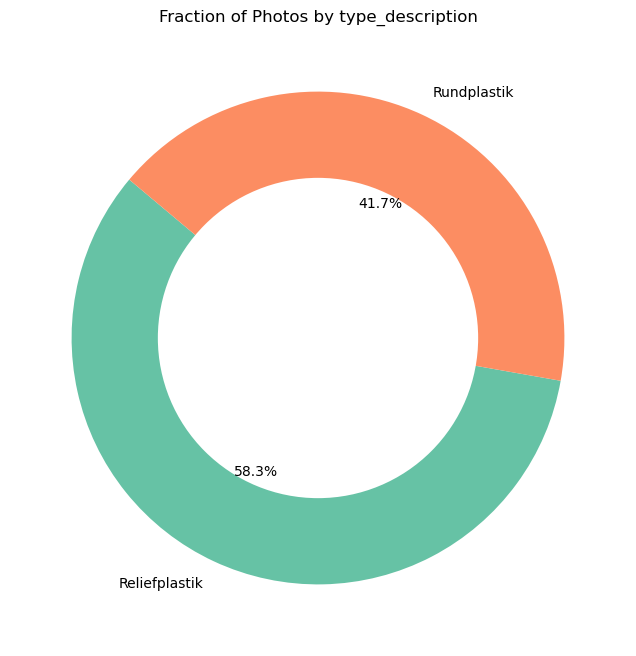

In [44]:
photos_collection.plot_values(x_widget.value, y_widget.value)

<div class="alert alert-block alert-info">
    <b>Note:</b> To save the chart image directly to your device, simply right-click on the chart and choose the "Save image as..." option from the menu.</div>

# Useful links<a id='useful'></a>

* Jupyter Notebook Documentation: <a href="https://docs.jupyter.org/en/latest/" target="blank"> https://docs.jupyter.org/en/latest/</a>
* Python Documentation: <a href="https://docs.python.org/3/" target="blank">https://docs.python.org/3/</a>
* Pandas Documentation: <a href="https://pandas.pydata.org/docs/" target="blank">https://pandas.pydata.org/docs/</a>



# Contact information<a id='contact'></a>
* For assistance or questions please contact [alessandra.failla@hotmail.it](mailto:alessandra.failla@hotmail.it)
* All resources related to this notebook are accessible on the associated GitHub Repository: </br><a href="https://github.com/AlessandraFa/photo-archive-data-analysis-framework.git" target="blank">https://github.com/AlessandraFa/photo-archive-data-analysis-framework.git</a>